In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans

In [7]:
n_clusters = 5

img = cv.imread(r"D:\Opencv\class.vision-master\images\felfel-dolme.jpg")

flat_img = img.reshape((-1, 3))

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(flat_img)

dominent_colors = np.array(kmeans.cluster_centers_, dtype='uint8')
labels = kmeans.labels_

print(dominent_colors)
print(labels)

D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[  2  57  21]
 [  2 179 245]
 [ 28  59 184]
 [ 10 138  75]
 [129 189 226]]
[2 2 2 ... 0 0 0]


In [8]:
percentages = np.bincount(labels)/len(flat_img)
percentages

array([0.27510121, 0.33724591, 0.2107899 , 0.1491829 , 0.02768008])

In [11]:
p_and_c = zip(percentages, dominent_colors)
p_and_c = sorted(p_and_c, reverse=True)

([], [])

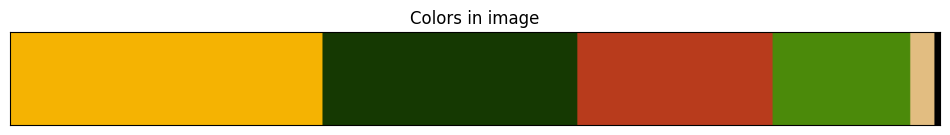

In [14]:
bar = np.ones((50, 500, 3), dtype='uint8')
plt.figure(figsize=(12,8))
plt.title("Colors in image")
start = 0
i = 0

for p, c in p_and_c:
    end = start + int(p*500)
    if i == n_clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
    
plt.imshow(bar)
plt.xticks([])
plt.yticks([])